In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import scipy.stats as st
import pandas as pd
from numba import njit


Bad key text.latex.preview in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default qualit

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
@njit
def reorient_firefly(x0, y0, theta0, rand, v0, delta_t):
    new_theta = theta0 + np.random.uniform(-rand, rand)
    
    x_new = x0 + v0*delta_t*np.cos(new_theta)
    y_new = y0 + v0*delta_t*np.sin(new_theta)
    
    return x_new, y_new, new_theta

In [4]:
@njit
def update_clock(level, activation, drop, delta):
    if level >= 1 and activation == 0:
        level = 1
        activation = 1
    if level <= 1 and activation == 1:
        level -= drop
    if level <= 0 and activation == 1:
        level = 0
        activation = 0
    if 0 <= level < 1 and activation == 0:
        level += delta
    return level, activation

In [5]:
@njit
def speed_clock(x0, y0, x, y, activations_all, activation, levels, drop, delta, R):
    if activation == 1:
        nearby_indexes = np.where(np.sqrt((x%L - x0)**2 + (y%L - y0)**2) < R)[0]
        for idx in nearby_indexes:
            if activations_all[idx] == 0:
                levels[idx], activations_all[idx] = update_clock(levels[idx], activations_all[idx], drop, delta)
    return levels, activations_all

In [6]:
N_fireflies = 400
L = 20
delta_t = 0.1
v = np.random.uniform(0.05, 0.1, N_fireflies)
R = 7
delta = 0.02
drop = 0.2

x = np.random.uniform(0, L, N_fireflies)
y = np.random.uniform(0, L, N_fireflies)
theta = np.random.uniform(0, 2*np.pi, N_fireflies)
levels = np.random.uniform(0, 0.95, N_fireflies)
activation = np.zeros(N_fireflies)

In [7]:
max_it = 8000
light_intensity = []
std_clock = []

n_markers = 10
diff_size = 5
alpha_value = 0.02

for i in tqdm(range(max_it)):
#     if i >= 6000:
#         fig, ax = plt.subplots(1,2, figsize=(10,5))
#         ax[0].grid(True, lw = 1, color = 'grey', alpha = 0.4)
#         ax[0].plot(light_intensity, color = 'lawngreen', lw = 2)
#         ax[0].set_ylim(0, 1)
#         ax[0].set_ylabel('Intensidade de luz', fontsize = 14, color = 'white')
#         if i < 400:
#             ax[0].set_xlim(0, 400)
#             ax[0].set_xticks([0, 100, 200, 300, 400])
#         else:
#             ax[0].set_xlim(i-400, i)
#             ax[0].set_xticks([i-400, i-300, i-200, i-100, i])
#         ax[0].set_title('Intensidade luminosa', fontsize = 18, pad = 30, color = 'white')
#         ax[0].set_xlabel('Tempo [min]', fontsize = 14, color = 'white')
#         ax[0].set_xticklabels([f'{ax[0].get_xticks()[i]*delta_t:.1f}' for i in range(len(ax[0].get_xticks()))])
#         fig.text(0.3, 0.89, '1 = Todos vagalumes acesos \n 0 = Nenhum vagalume aceso', ha = 'center',
#                  fontsize = 11, color = 'white')

#         plt.scatter(x, y, s = 10,
#                     facecolor = 'grey', zorder = 1)
#         if len(np.where(activation == 1)[0]) > 0:
#             plt.scatter(x[np.where(activation == 1)[0]], y[np.where(activation == 1)[0]], s = 10,
#                         facecolor = 'lawngreen', alpha = levels[np.where(activation == 1)[0]])
#             for n in range(1, n_markers+1):
#                 plt.scatter(x[np.where(activation == 1)[0]], y[np.where(activation == 1)[0]], s = 10+(diff_size*n),
#                         facecolor = 'lawngreen', alpha = alpha_value)
#         plt.quiver(x, y, v*np.cos(theta), v*np.sin(theta), color = 'grey', zorder = 0)
#         plt.xlim(0, L)
#         plt.ylim(0, L)
#         plt.xticks([])
#         plt.yticks([])
#         fig.patch.set_facecolor('#212946')
#         for ax in fig.axes:
#             ax.patch.set_facecolor('#212946')
#             ax.tick_params(color='white', labelcolor='white')
#             for spine in ax.spines.values():
#                 spine.set_edgecolor('white')
#         plt.title('Sincronização de vagalumes', fontsize = 18, pad = 16, color = 'white')
#         plt.savefig(f'Gifs/Fireflies_{i-6000}.png', dpi = 300, bbox_inches = 'tight')
#         plt.close()
    x_new = x.copy()
    y_new = y.copy()
    theta_new = theta.copy()
    levels_new = levels.copy()
    activation_new = activation.copy()
    
    for j in range(N_fireflies):
        x_new[j], y_new[j], theta_new[j] = reorient_firefly(x[j], y[j], theta[j], np.pi/10, v[j], delta_t)
        levels_new[j], activation_new[j] = update_clock(levels[j], activation[j], drop, delta)
        levels_new, activation_new = speed_clock(x[j], y[j], x, y, activation_new, activation_new[j],
                                                       levels_new, drop, delta, R)

        if x_new[j] > L:
            x_new[j] = x_new[j] - L
        elif x_new[j] < 0:
            x_new[j] = x_new[j] + L

        if y_new[j] > L:
            y_new[j] = y_new[j] - L
        elif y_new[j] < 0:
            y_new[j] = y_new[j] + L

    x = x_new
    y = y_new
    theta = theta_new
    levels = levels_new
    activation = activation_new
    
    light_intensity.append(np.sum(activation)/N_fireflies)
    std_clock.append(np.std(levels))

100%|██████████| 8000/8000 [00:58<00:00, 137.06it/s]


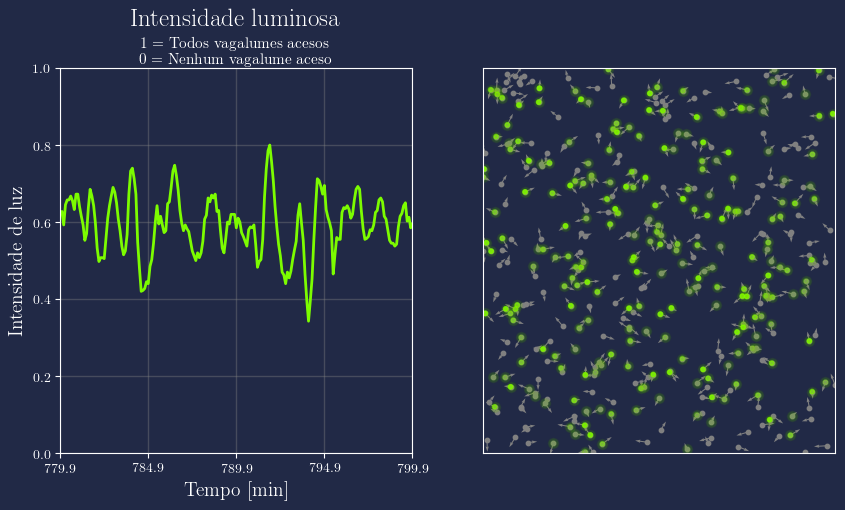

In [8]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].grid(True, lw = 1, color = 'grey', alpha = 0.4)
ax[0].plot(light_intensity, color = 'lawngreen', lw = 2)
ax[0].set_ylim(0, 1)
ax[0].set_ylabel('Intensidade de luz', fontsize = 14, color = 'white')
ax[0].set_xlim(i-200, i)
ax[0].set_title('Intensidade luminosa', fontsize = 18, pad = 30, color = 'white')
ax[0].set_xlabel('Tempo [min]', fontsize = 14, color = 'white')
ax[0].set_xticks([i-200, i-150, i-100, i-50, i])
ax[0].set_xticklabels([f'{ax[0].get_xticks()[i]*delta_t:.1f}' for i in range(len(ax[0].get_xticks()))])
fig.text(0.3, 0.89, '1 = Todos vagalumes acesos \n 0 = Nenhum vagalume aceso', ha = 'center',
         fontsize = 11, color = 'white')

plt.scatter(x, y, s = 10,
            facecolor = 'grey', zorder = 1)
if len(np.where(activation == 1)[0]) > 0:
    plt.scatter(x[np.where(activation == 1)[0]], y[np.where(activation == 1)[0]], s = 10,
                facecolor = 'lawngreen', alpha = levels[np.where(activation == 1)[0]])
    n_markers = 10
    diff_size = 5
    alpha_value = 0.02
    for n in range(1, n_markers+1):
        plt.scatter(x[np.where(activation == 1)[0]], y[np.where(activation == 1)[0]], s = 10+(diff_size*n),
                facecolor = 'lawngreen', alpha = alpha_value)

plt.quiver(x, y, v*np.cos(theta), v*np.sin(theta), color = 'grey', zorder = 0)
plt.xlim(0, L)
plt.ylim(0, L)
plt.xticks([])
plt.yticks([])
fig.patch.set_facecolor('#212946')
for ax in fig.axes:
    ax.patch.set_facecolor('#212946')
    ax.tick_params(color='white', labelcolor='white')
    for spine in ax.spines.values():
        spine.set_edgecolor('white')
# plt.title('Sincronização de vagalumes', fontsize = 18, pad = 16, color = 'white')
plt.show()

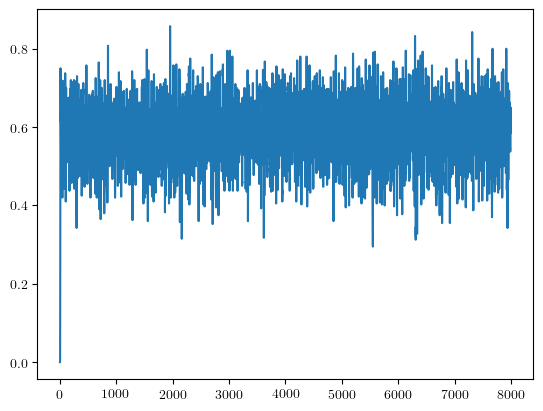

In [9]:
plt.plot(light_intensity)
# plt.xlim(1000,2500)
plt.show()

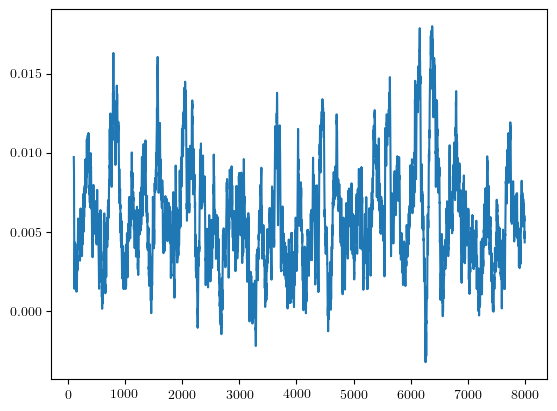

In [10]:
# plt.plot(std_clock)
plt.plot(1 - pd.DataFrame(std_clock).rolling(100).mean()/0.288)
# plt.xlim(2500,3000)
plt.show()

In [80]:
max_it = 5000
step = 0.005

light_intensity_final = []
std_clock_final = []

for j in tqdm(range(30)):
    N_fireflies = 500
    L = 20
    delta_t = 0.1
    v = np.random.uniform(0.05, 0.1, N_fireflies)
    R = 7
    delta = step*j
    drop = 0.2
    light_intensity = []
    std_clock = []
    for k in range(150):
        x = np.random.uniform(0, L, N_fireflies)
        y = np.random.uniform(0, L, N_fireflies)
        theta = np.random.uniform(0, 2*np.pi, N_fireflies)
        levels = np.random.uniform(0, 0.95, N_fireflies)
        activation = np.zeros(N_fireflies)
        
        for i in range(max_it):
            x_new = x.copy()
            y_new = y.copy()
            theta_new = theta.copy()
            levels_new = levels.copy()
            activation_new = activation.copy()

            for j in range(N_fireflies):
                x_new[j], y_new[j], theta_new[j] = reorient_firefly(x[j], y[j], theta[j], np.pi/10, v[j], delta_t)
                levels_new[j], activation_new[j] = update_clock(levels[j], activation[j], drop, delta)
                levels_new, activation_new = speed_clock(x[j], y[j], x, y, activation_new, activation_new[j],
                                                               levels_new, drop, delta, R)

                if x_new[j] > L:
                    x_new[j] = x_new[j] - L
                elif x_new[j] < 0:
                    x_new[j] = x_new[j] + L

                if y_new[j] > L:
                    y_new[j] = y_new[j] - L
                elif y_new[j] < 0:
                    y_new[j] = y_new[j] + L

            x = x_new
            y = y_new
            theta = theta_new
            levels = levels_new
            activation = activation_new
            
        light_intensity.append(np.sum(activation)/N_fireflies)
        std_clock.append(np.std(levels))
        
    light_intensity_final.append(light_intensity)
    std_clock_final.append(std_clock)

100%|██████████| 30/30 [41:38:40<00:00, 4997.34s/it]   


In [81]:
light_intensity_final = np.array(light_intensity_final)
std_clock_final = np.array(std_clock_final)

In [82]:
mean_std = np.mean(std_clock_final, axis = 1)

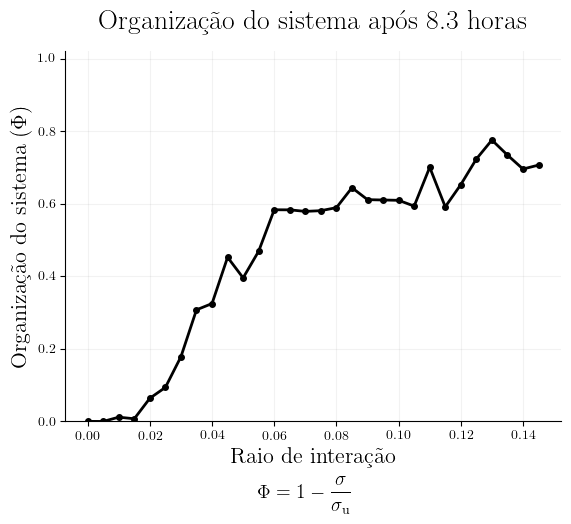

In [85]:
fig, ax = plt.subplots()
ax.grid(True, color = 'grey', alpha = 0.1)
# plt.plot(1 - np.mean(std_clock_final, axis = 0)/0.288, alpha = 0.6)
plt.plot([step*i for i in range(std_clock_final.shape[0])],
         1 - mean_std/0.288, lw = 2, color = 'black', marker = 'o', markersize = 4)
# plt.fill_between([step*i for i in range(std_clock_final.shape[0])],
#          1 - mean_std/0.288 - np.std(std_clock_final, axis = 1)/0.288,
#         1 - mean_std/0.288 + np.std(std_clock_final, axis = 1)/0.288,
#                 alpha = 0.2)
plt.ylabel(r'Organização do sistema $(\Phi)$', fontsize = 16)
plt.xlabel('Raio de interação', fontsize = 16)
fig.text(0.5, -0.05, r'$\Phi = \displaystyle 1 - \frac{\sigma}{\sigma_\mathrm{u}}$',
         fontsize = 14, ha = 'center')
# plt.xscale('log')
plt.ylim(0, 1.02)
# plt.xlim(0, 27)
plt.title(f'Organização do sistema após {max_it*delta_t/60:.1f} horas', fontsize = 20, pad = 16)

ax.spines[['right','top']].set_visible(False)

# plt.savefig('Organizacao_sistema_&_raio_v2.png', dpi = 400, bbox_inches = 'tight')
# plt.savefig('Organizacao_sistema_&_raio_v2.svg', dpi = 400, bbox_inches = 'tight')
plt.show()